$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $
## <font style="font-size:28px;" align="left"><b>Bilkent University</b></font><br>
<font style="font-size:24px;" align="left"><b>MATH 421 Introduction to Quantum Computation - Fall 2022</b></font><br>
<font style="font-size:20px;" align="left"><b>Qiskit Lecture 2 - Multi Qubit Systems</b></font>

In [1]:
import qiskit as q
from qiskit import Aer
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
from matplotlib import style 
from qiskit.circuit.library.standard_gates import *
style.use("dark_background")
simulator = Aer.get_backend("qasm_simulator")
statevec_sim = Aer.get_backend("statevector_simulator")

<h2> Two-qubit systems </h2>
From the previous lectures, we know that single qubit state can be represented as <br>
$$\ket{\psi} = \alpha\ket{0} + \beta\ket{1} = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} \in \mathbb{C}^2$$ where $|\alpha|^2 + |\beta|^2 = 1$ <br>
<br>
Now, let's say we have two arbitrary single qubit states $\ket{\psi} = \begin{pmatrix} \alpha_\psi \\ \beta_\psi \end{pmatrix}$ and $\ket{\phi} = \begin{pmatrix} \alpha_\phi \\ \beta_\phi \end{pmatrix}$, then we can use tensor product to construct a two qubit state, i.e. a product state: <br>
$$\ket{\psi} \otimes \ket{\phi} = \begin{pmatrix} \alpha_\psi \\ \beta_\psi \end{pmatrix} \otimes \begin{pmatrix} \alpha_\phi \\ \beta_\phi \end{pmatrix} = \begin{pmatrix} \alpha_\psi \alpha_\phi \\ \alpha_\psi \beta_\phi \\ \beta_\psi \alpha_\phi \\ \beta_\psi \beta_\phi \end{pmatrix}$$ <br> 
As a shorthand notation we can denote the state as follows:
$$\ket{\psi} \otimes \ket{\phi} = \ket{\psi\phi}$$ eg. $\ket{00}$, $\ket{010}$

In [ ]:
qr = q.QuantumRegister(2,'qubits')
cr = q.ClassicalRegister(2,'classical_reg')

qcirc = q.QuantumCircuit(qr,cr)
qcirc.x(0)
qcirc.barrier()
qcirc.measure(qr,cr)

qcirc.draw(output = 'mpl')


We can write the initial state of the circuit as $\ket{00}$ since all qubits in the qiskit initialized as $\ket{0}$. <br>
Then we apply the X gate to the first qubit and nothing to the second qubit, we can describe the circuit mathematically as: <br>
$( X \otimes \mathbb{1}) \ket{00} = X\ket{0} \otimes \mathbb{1}\ket{0} = \ket{10}$ <br> 
Alternatively we can write $X \otimes \mathbb{1}$ as <br>

$ \begin{pmatrix} 0 & 1 \\ 1 & 0  \end{pmatrix} \otimes \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}  = 
\begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{pmatrix}$

We can write the initial state of the circuit as $\ket{00}$ since all qubits in the qiskit initialized as $\ket{0}$. <br>
Then we apply the X gate to the first qubit and nothing to the second qubit, we can describe the circuit mathematically as: <br>
$(\mathcal{I} \otimes X) \ket{00} = \mathcal{I}\ket{0} \otimes X\ket{0} = \ket{01}$ <br> 
Alternatively we can write $\mathcal{I} \otimes X$ as <br>

$\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \otimes \begin{pmatrix} 0 & 1 \\ 1 & 0  \end{pmatrix} = \begin{pmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$

Here we are using the tensor product of matrices, which generalizes the tensor product of vectors given above:

$\begin{pmatrix} a & b \\ c & d \end{pmatrix} \otimes \begin{pmatrix} x & y \\ z & t  \end{pmatrix} = 
\begin{pmatrix} a\cdot \begin{pmatrix} x & y \\ z & t  \end{pmatrix} & b\cdot \begin{pmatrix} x & y \\ z & t  \end{pmatrix} \\
 c\cdot \begin{pmatrix} x & y \\ z & t  \end{pmatrix} & d\cdot \begin{pmatrix} x & y \\ z & t  \end{pmatrix} \end{pmatrix} =
\begin{pmatrix} ax & ay & bx & by \\ az & at & bz & bt \\ cx & cy & dx & dy \\ cz & ct & dz & dt \end{pmatrix}$




In [ ]:
job = q.execute(qcirc,simulator, shots = 1024)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)  

<h2> The famous CNOT Gate and Entanglement </h2>

An important gate in Quantum Computing is the CNOT gate. It is used to create entanglement between two qubits. It takes two qubits as inputs: control and target. This gate can be written as: <br>
First physical implementation -> 1995 with Beryllium ion trap (https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.75.4714)
$$
\ket{\text{target,control}}  = \left\{
    \begin{array}\\
        \ket{\text{target}} \otimes \ket{\text{control}} & \mbox{if } \ \ket{\text{control}} = \ket{0} \\
        X\ket{\text{target}} \otimes \ket{\text{control}} & \mbox{if } \ \ket{\text{control}} = \ket{1} \\
    \end{array}
\right.
$$


Let's see this gate in action by looking to all 4 possible cases.


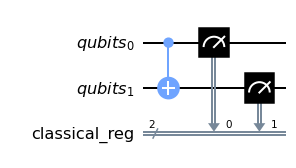

{'00': 1024}


In [2]:
qr = q.QuantumRegister(2,'qubits')
cr = q.ClassicalRegister(2,'classical_reg')

qcirc1 = q.QuantumCircuit(qr,cr)
qcirc1.cnot(0,1)
qcirc1.measure(qr,cr)
display(qcirc1.draw(output = 'mpl'))
#display(qcirc1.draw(output = 'mpl',reverse_bits=True))
job = q.execute(qcirc1,simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

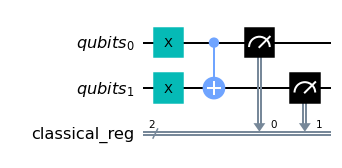

{'01': 1024}


In [3]:
qr = q.QuantumRegister(2,'qubits')
cr = q.ClassicalRegister(2,'classical_reg')

qcirc2 = q.QuantumCircuit(qr,cr)
qcirc2.x(0)
qcirc2.x(1)
qcirc2.cnot(0,1)
qcirc2.measure(qr,cr)
display(qcirc2.draw(output = 'mpl'))
job = q.execute(qcirc2,simulator, shots = 1024)

result = job.result()
counts = result.get_counts()
print(counts)

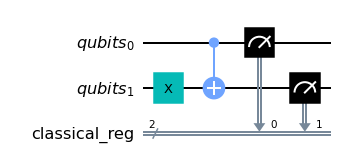

{'10': 1024}


In [4]:
qr = q.QuantumRegister(2,'qubits')
cr = q.ClassicalRegister(2,'classical_reg')

qcirc3 = q.QuantumCircuit(qr,cr)
qcirc3.x(1)
qcirc3.cnot(0,1)
qcirc3.measure(qr,cr)
display(qcirc3.draw(output = 'mpl'))
job = q.execute(qcirc3,simulator, shots = 1024)

result = job.result()
counts = result.get_counts()
print(counts)

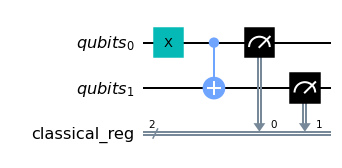

{'11': 1024}


In [5]:
qr = q.QuantumRegister(2,'qubits')
cr = q.ClassicalRegister(2,'classical_reg')

qcirc4 = q.QuantumCircuit(qr,cr)
qcirc4.x(0)
qcirc4.cnot(0,1)
qcirc4.measure(qr,cr)
display(qcirc4.draw(output = 'mpl'))
job = q.execute(qcirc4,simulator, shots = 1024)

result = job.result()
counts = result.get_counts()
print(counts)

We mentioned that multiple qubit states can be represented by a tensor product. However, this is not always true. Some states cannot be written as a tensor product of single qubit states, i.e. as product states. Such states are called entangled states. The most famous ones are so called the Bell States:
$$ \ket{\Phi^+} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11})$$ $$ \ket{\Phi^-} = \frac{1}{\sqrt{2}} (\ket{00} - \ket{11})$$ $$ \ket{\Psi^+} = \frac{1}{\sqrt{2}}(\ket{01} + \ket{10}) $$ $$\ket{\Psi^-} = \frac{1}{\sqrt{2}}(\ket{01} - \ket{10})$$ 
As an exercise, let's try to create $\ket{\Phi^+}$ state using H and CNOT gates.

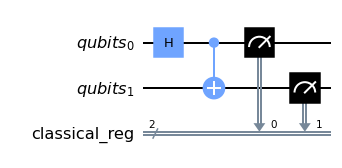

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


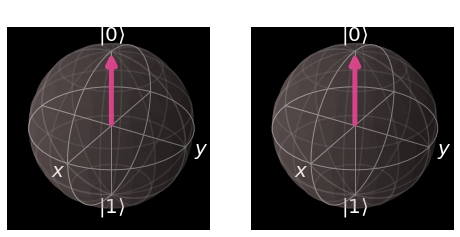

In [10]:
qr = q.QuantumRegister(2,'qubits')
cr = q.ClassicalRegister(2,'classical_reg')

circ = q.QuantumCircuit(qr,cr)
circ.h(0)
#circ.h(1)
circ.cnot(0,1)
circ.measure(qr,cr)
display(circ.draw(output = 'mpl'))

job = q.execute(circ,statevec_sim, shots = 1024)

result = job.result()
state1 = result.get_statevector()
counts = result.get_counts()
print(state1)
plot_bloch_multivector(state1)

<h2> SWAP Gate </h2>

The SWAP gate is used to change places of two qubits in a Quantum Circuit. This operation can be shown as:
$$SWAP\ket{\psi \phi } = \ket{\phi \psi}$$
Now, let's look at the Qiskit implementation of SWAP gate:

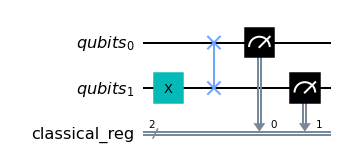

{'01': 1024}


In [11]:
qr = q.QuantumRegister(2,'qubits')
cr = q.ClassicalRegister(2,'classical_reg')

circ = q.QuantumCircuit(qr,cr)
circ.x(1) #Mark one of the states
circ.swap(0,1)
circ.measure(qr,cr)
display(circ.draw(output = 'mpl'))
job = q.execute(circ,simulator, shots = 1024)

result = job.result()
counts = result.get_counts()
print(counts)

However, the SWAP gate can also be implemented by using 3 CNOT gates as follows:

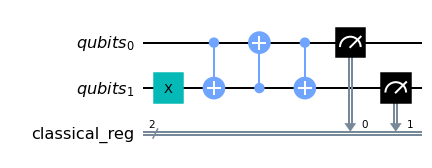

{'01': 1024}


In [12]:
qr = q.QuantumRegister(2,'qubits')
cr = q.ClassicalRegister(2,'classical_reg')

circ = q.QuantumCircuit(qr,cr)
circ.x(1) #Mark one of the states
circ.cnot(0,1)
circ.cnot(1,0)
circ.cnot(0,1)
circ.measure(qr,cr)
display(circ.draw(output = 'mpl'))
job = q.execute(circ,simulator, shots = 1024)

result = job.result()
counts = result.get_counts()
print(counts)

<h2> Toffoli or CCNOT Gate </h2>

Toffoli or CCNOT gate is basically a NOT gate which has two control qubits. 
$$
\ket{\text{target,control1,control2}}  = \left\{
    \begin{array}\\
        X\ket{\text{target}} \otimes \ket{\text{control1,control2}}  & \mbox{if } \ \ket{\text{control1, control2}} = \ket{11} \\
        \ket{\text{target}} \otimes \ket{\text{control1,control2}}  &  \text{otherwise} \\
    \end{array}
\right.
$$
Toffoli Gate is a universal and reversible logic gate. That is, you can construct any reversible classical circuit using Toffoli Gates. It can be constructed using 6 CNOTs and single qubit gate. Now let's see how we use this gate in Qiskit.


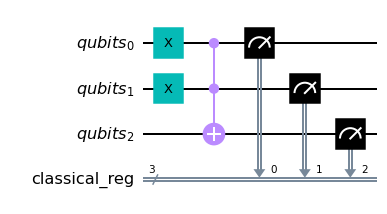

{'111': 1024}


In [13]:
q_reg = q.QuantumRegister(3,'qubits')
c_reg = q.ClassicalRegister(3,'classical_reg')

circ = q.QuantumCircuit(q_reg,c_reg)
circ.x(0)
circ.x(1)
circ.ccx(0,1,2)
circ.measure(q_reg,c_reg)
display(circ.draw(output = 'mpl'))
job = q.execute(circ,simulator, shots = 1024)

result = job.result()
counts = result.get_counts()
print(counts)

<h2> Controlled Unitary Gates </h2>

You can also add control qubits to the unitary gates in Qiskit. These controls can be Quantum Bits and Classical Bits. Let's see an example by adding a control to a Hadamard gate.

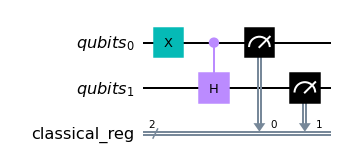

{'01': 508, '11': 516}


In [15]:
q_reg = q.QuantumRegister(2,'qubits')
c_reg = q.ClassicalRegister(2,'classical_reg')

circ = q.QuantumCircuit(q_reg,c_reg)
ch_gate = HGate().control(1)
circ.x(0)
circ.append(ch_gate,q_reg)
circ.measure(q_reg,c_reg)
display(circ.draw(output = 'mpl'))
job = q.execute(circ,simulator, shots = 1024)

result = job.result()
counts = result.get_counts()
print(counts)

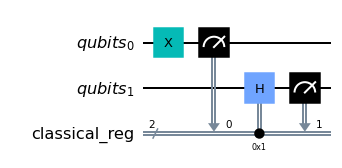

{'01': 524, '11': 500}


In [16]:
q_reg2 = q.QuantumRegister(2,'qubits')
c_reg2 = q.ClassicalRegister(2,'classical_reg')

circ2 = q.QuantumCircuit(q_reg2,c_reg2)
circ2.x(0)

circ2.measure(0,0)
circ2.h(1).c_if(c_reg2,1)
circ2.measure(1,1)
display(circ2.draw(output = 'mpl'))
job = q.execute(circ2,simulator, shots = 1024)

result = job.result()
counts = result.get_counts()
print(counts)